# Overview Switzerland

In [26]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)
#get the last entry
def sp(u):
   return float(u.split("-")[-1])
#coronapp  totals
url = 'https://www.bfs.admin.ch/bfsstatic/dam/assets/13407769/master'
swisscovidM = pd.read_csv(url, error_bad_lines = False, header=0, index_col=0, parse_dates=True, squeeze=True)

url = 'https://raw.githubusercontent.com/openZH/covid_19/master/COVID19_Fallzahlen_CH_total_v2.csv'
swissM = pd.read_csv(url, error_bad_lines = False, header=0, index_col=0, parse_dates=True, squeeze=True)
display(swissM.tail(14))

,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source,current_isolated,current_quarantined,current_quarantined_riskareatravel,current_quarantined_total
date,,,,,,,,,,,,,,,
2020-11-04,NaN,VS,NaN,15505.0,NaN,314.0,29.0,14.0,NaN,251.0,https://www.vs.ch/de/web/coronavirus,NaN,NaN,NaN,NaN
2020-11-04,00:00,OW,NaN,468.0,NaN,13.0,NaN,NaN,NaN,5.0,https://www.ow.ch/dl.php/de/5fa26b5f53bb2/OW-1...,NaN,NaN,NaN,NaN
2020-11-04,01:00,SO,NaN,3066.0,NaN,62.0,NaN,NaN,NaN,23.0,https://corona.so.ch/,NaN,NaN,NaN,NaN
2020-11-04,08:00,BE,NaN,16171.0,NaN,343.0,45.0,35.0,NaN,153.0,https://www.besondere-lage.sites.be.ch/besonde...,NaN,NaN,NaN,NaN
2020-11-04,08:00,TI,NaN,8858.0,NaN,207.0,16.0,12.0,1040.0,377.0,https://www4.ti.ch/fileadmin/DSS/DSP/UMC/malat...,NaN,NaN,NaN,NaN
2020-11-04,08:00,ZG,NaN,1967.0,NaN,35.0,4.0,NaN,1453.0,11.0,https://www.zg.ch/behoerden/gesundheitsdirekti...,NaN,NaN,NaN,NaN
2020-11-04,09:00,SZ,NaN,3577.0,NaN,NaN,NaN,NaN,1936.0,55.0,https://www.sz.ch/public/upload/assets/49487/C...,NaN,NaN,NaN,NaN
2020-11-04,09:15,SH,NaN,838.0,NaN,18.0,3.0,NaN,NaN,9.0,https://sh.ch/CMS/get/file/35e6cda9-45fa-4375-...,272.0,568.0,NaN,NaN
2020-11-04,09:30,BS,NaN,2907.0,NaN,89.0,12.0,NaN,2044.0,54.0,https://www.gesundheit.bs.ch,809.0,916.0,NaN,NaN


## New Cases Overview

,sum_ncumul_conf
date,
2020-10-22,101283.0
2020-10-23,108389.0
2020-10-24,107448.0
2020-10-25,111516.0
2020-10-26,125705.0
2020-10-27,133268.0
2020-10-28,142442.0
2020-10-29,146543.0
2020-10-30,159985.0


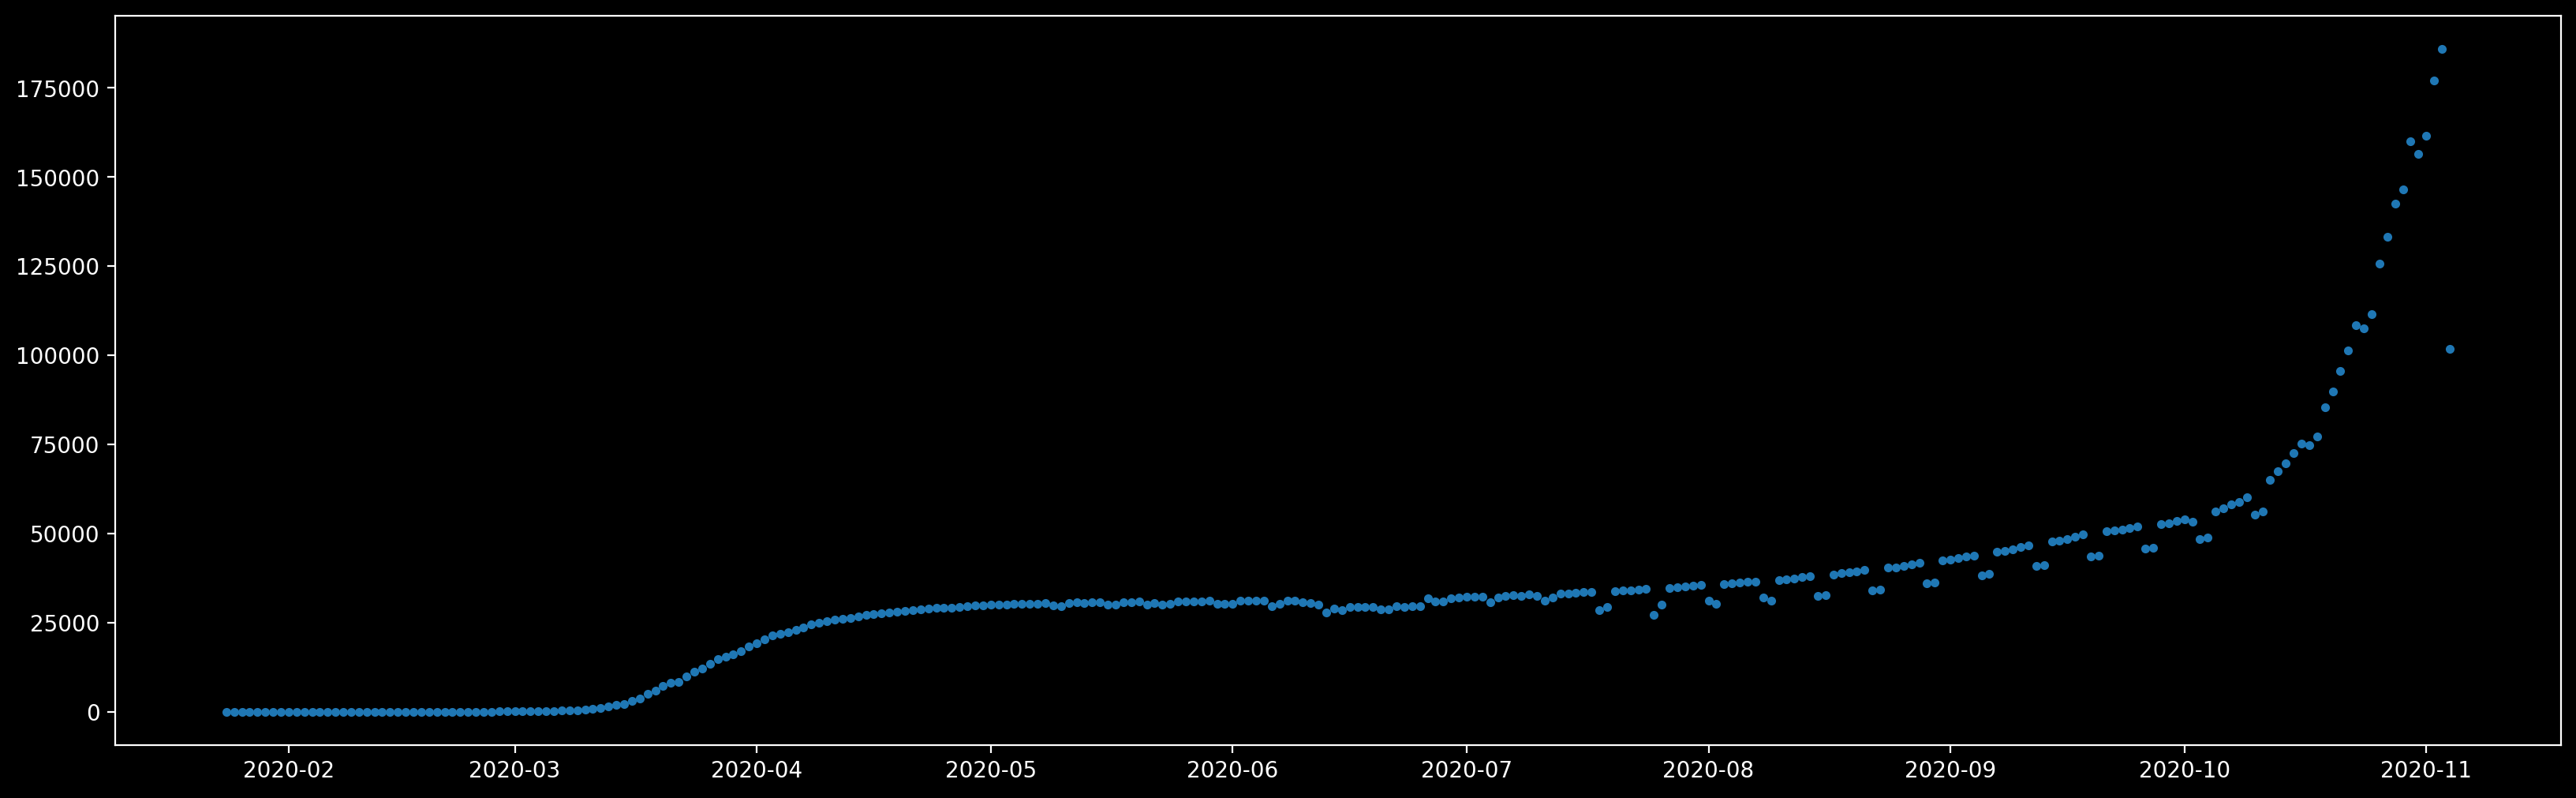

In [27]:
#swiss=swissM.groupby(['date', 'time','abbreviation_canton_and_fl'])['ncumul_conf'].sum().reset_index()
plt.figure(1)
swiss=swissM.groupby(
     ['date']
 ).agg(
     sum_ncumul_conf = ('ncumul_conf','sum')
 )
display(swiss.tail(14))
plt.plot(swiss,'.')

## current_hosp	Deceased

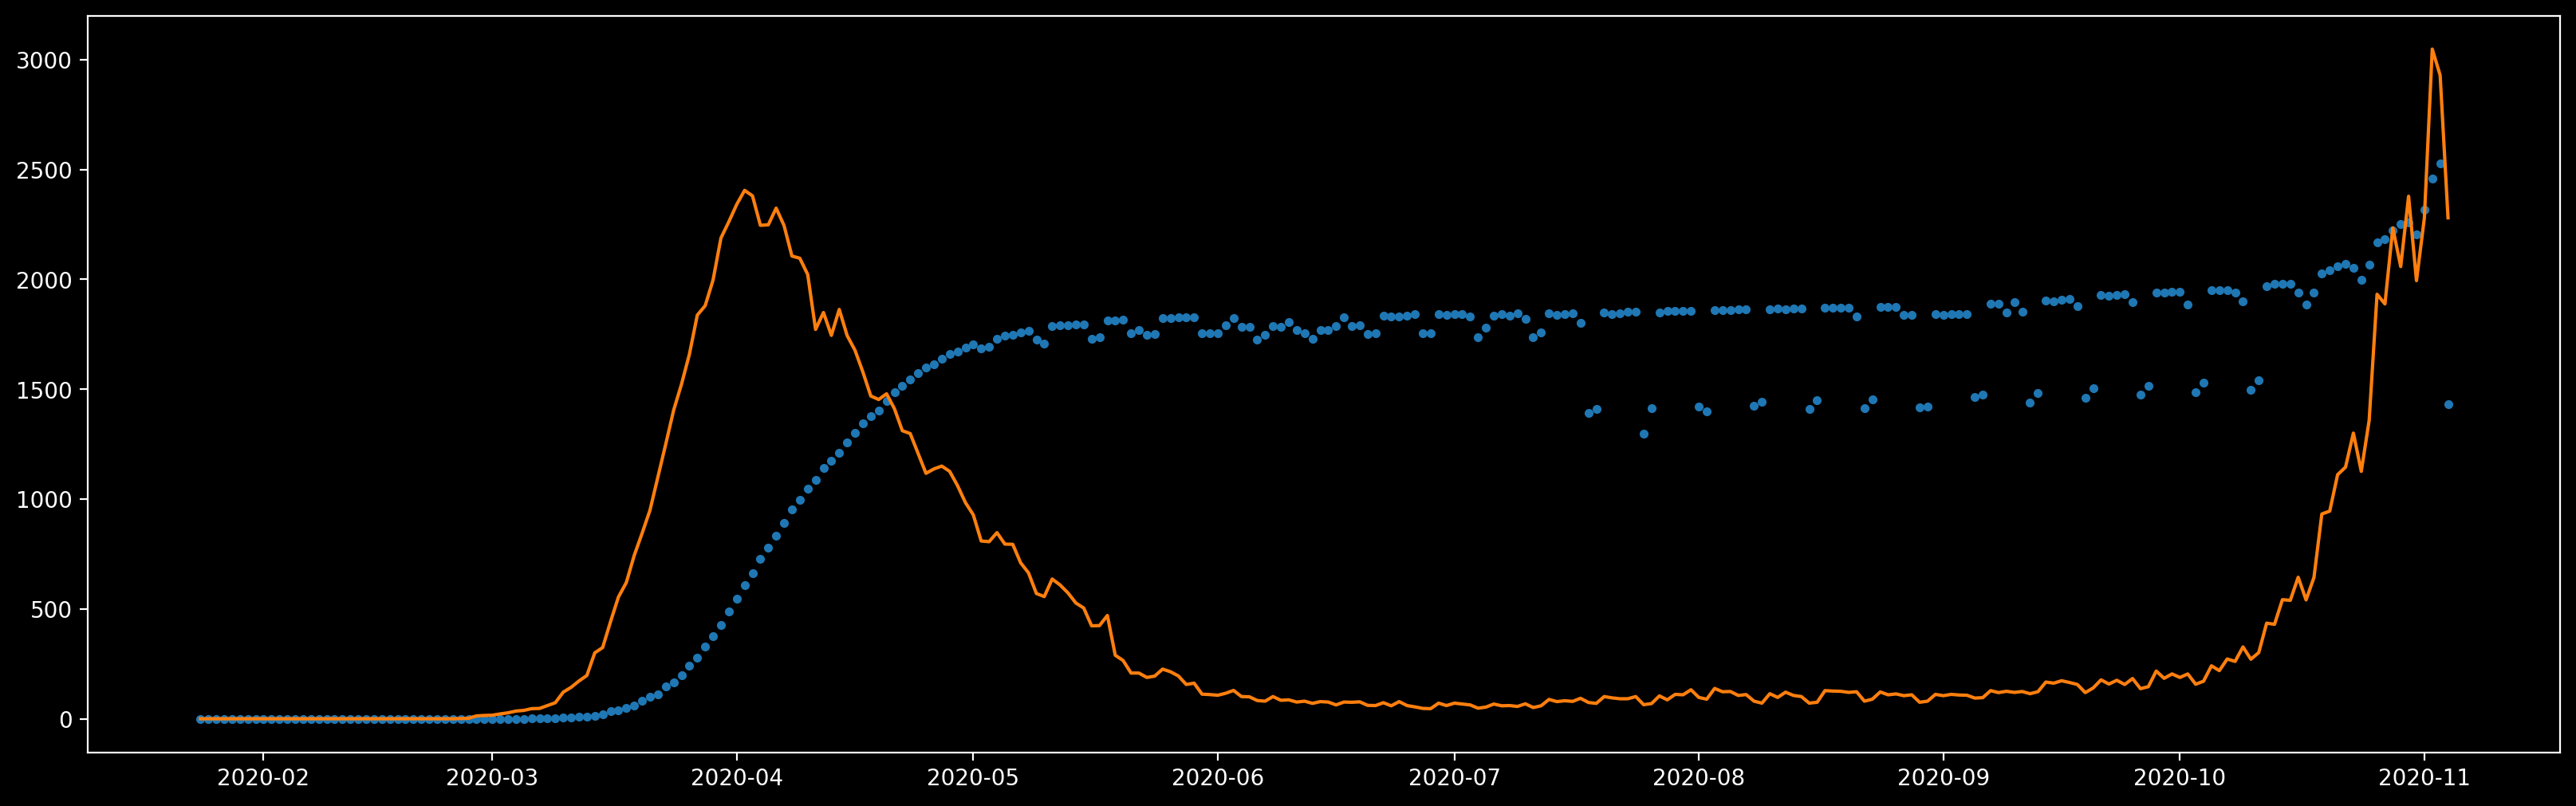

In [28]:
plt.figure(2)
swissd=swissM.groupby(
     ['date']
 ).agg(
    sum_ncumul_dec = ('ncumul_deceased','sum')
 )
plt.plot(swissd,'.')

swissh=swissM.groupby(
     ['date']
 ).agg(
    sum_ncumul_dec = ('current_hosp','sum')
 )
plt.plot(swissh,'-')

## Swisscovid

### Downloads

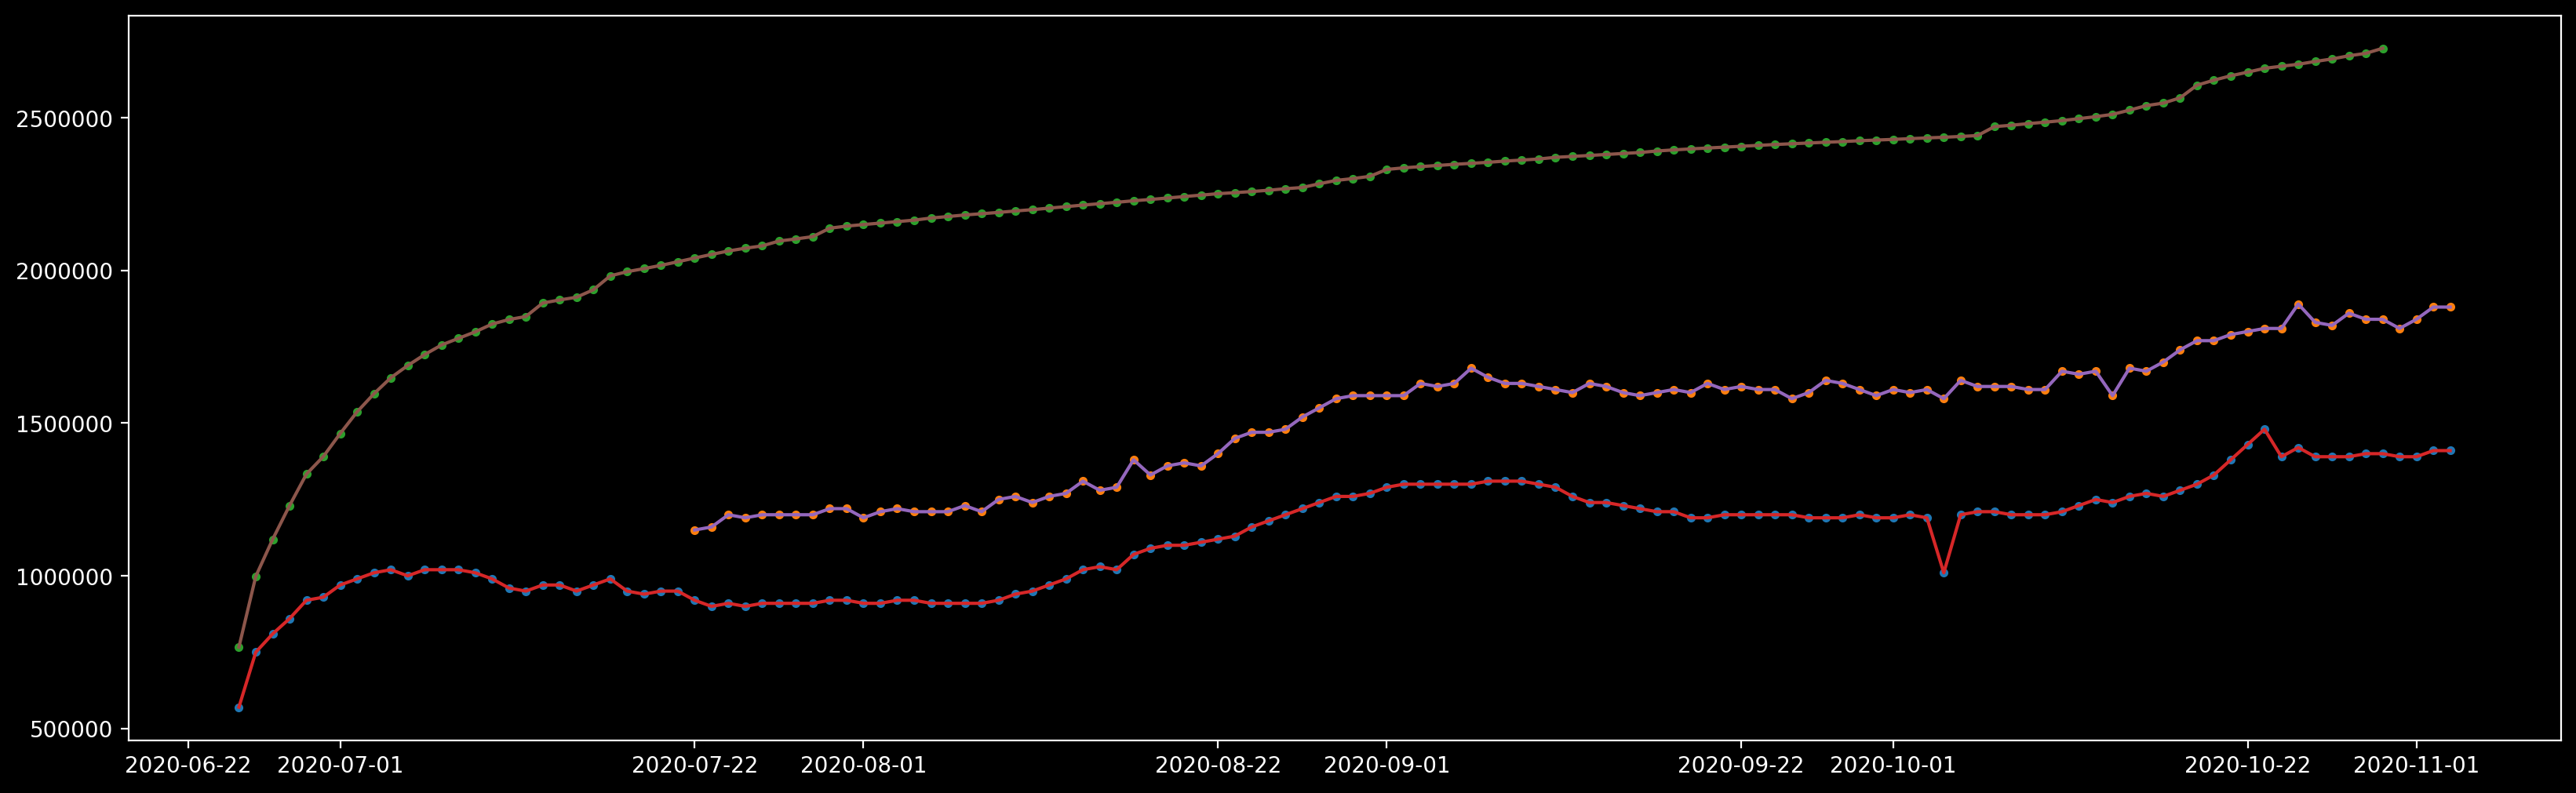

In [29]:
#calculate new cases from cumulated cases
plt.figure(3)
swisscovid = swisscovidM[swisscovidM.columns[[0,1,2]]]
plt.plot(swisscovid,'.')
plt.plot(swisscovid,'-')

### Entered Codes

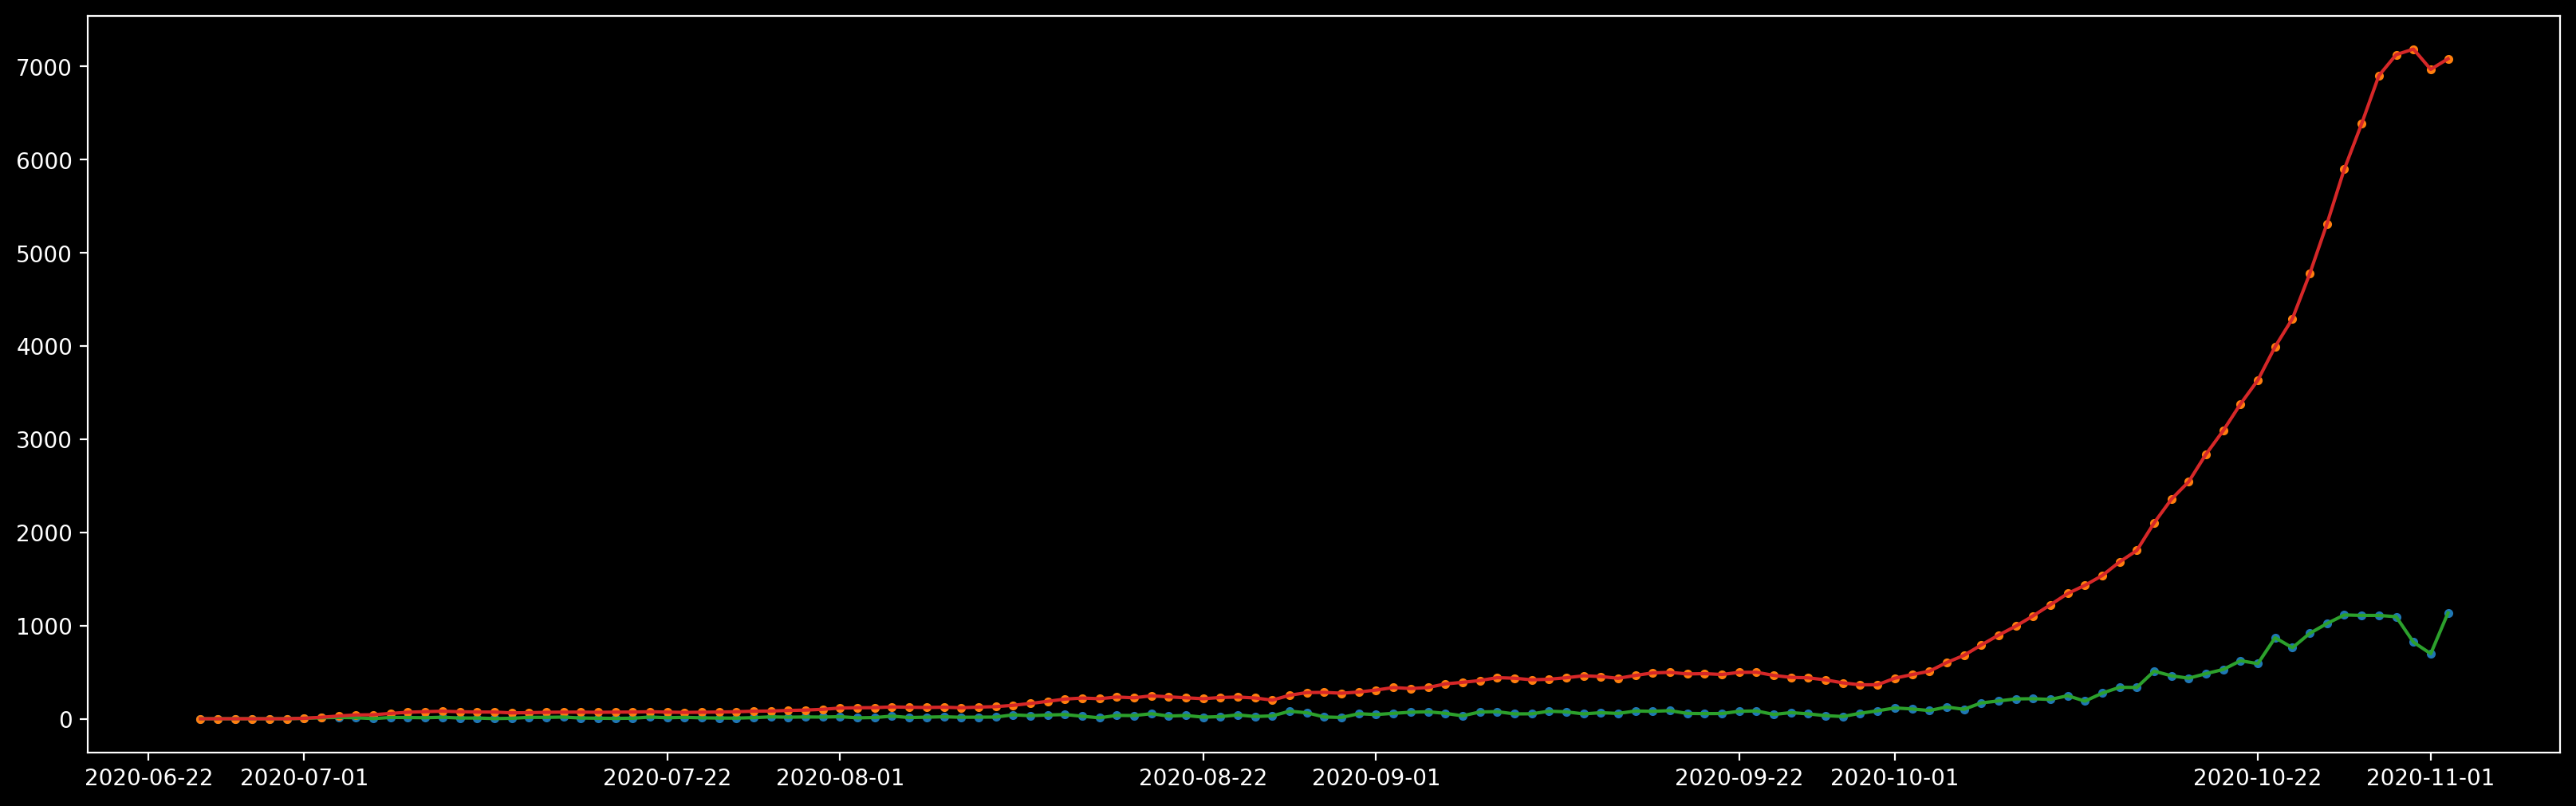

In [30]:
plt.figure(4)
swisscovid = swisscovidM[swisscovidM.columns[[3,4]]]
plt.plot(swisscovid,'.')
plt.plot(swisscovid,'-')
pyplot.show()